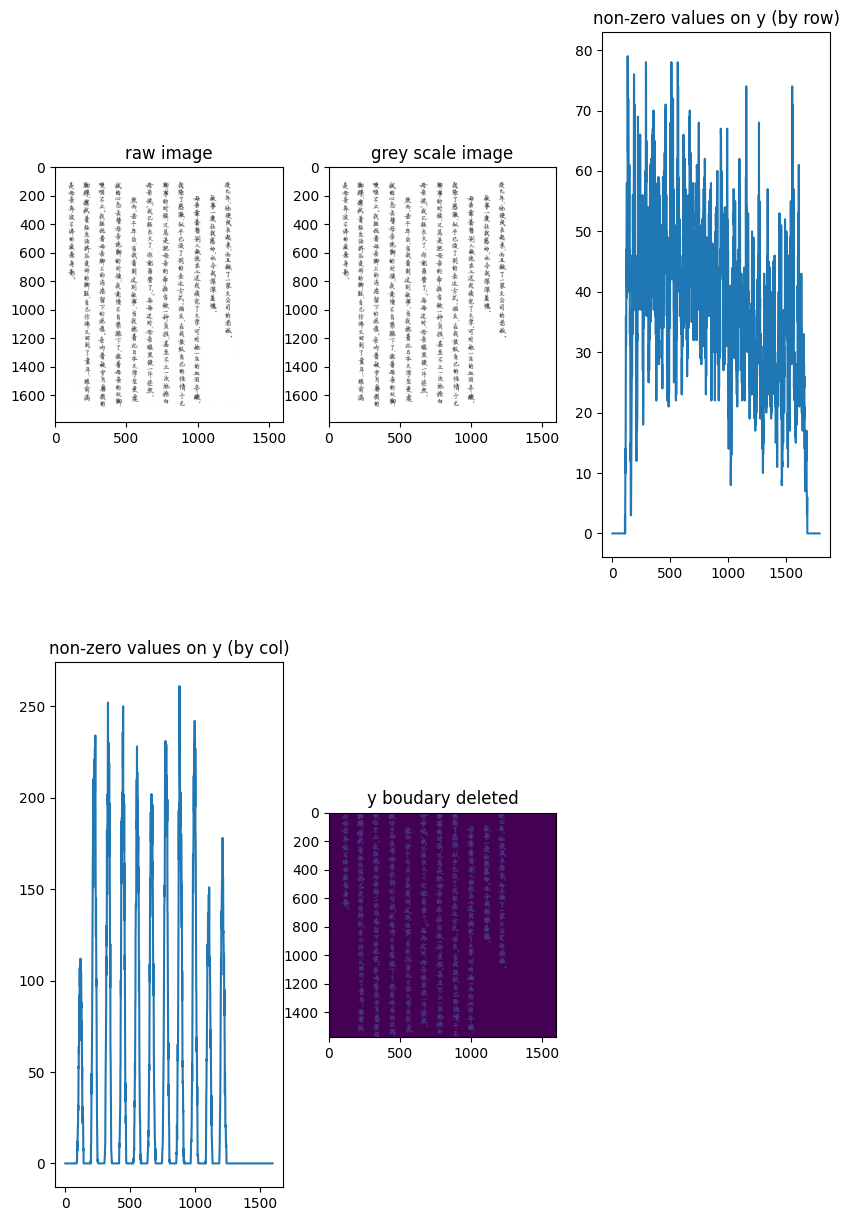

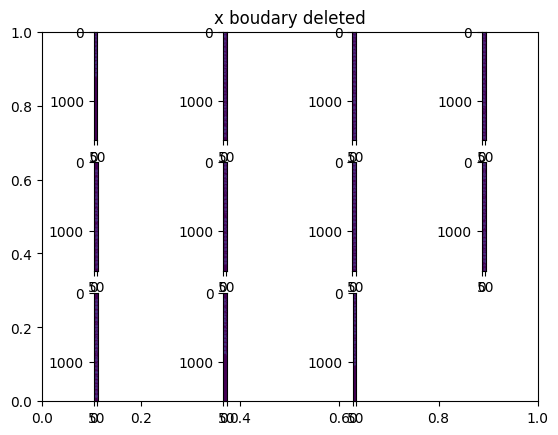

In [24]:
'''
Created on 2019年3月15日

@author: Qiuyi
'''
from matplotlib import pyplot as plt
import numpy as np
import cv2

rawPicPath = r"H:\TEMP\TEXT_PROCCESS\TEST08.jpg"
# rawPicPath = r"H:\TEMP\TEXT_PROCCESS\result\0.jpg"

rawimg = cv2.imread(rawPicPath)
# rawimg = cv2.imread(r"D:\LearningFiles\splitCharactersOfPicture(python+cv2)\6E57.jpg")
fig = plt.figure(figsize=(10,15))
fig.add_subplot(2,3,1)
plt.title("raw image")
plt.imshow(rawimg)

fig.add_subplot(2,3,2)
plt.title("grey scale image")
# 在处理之前，我们首先应该将图像去RGB，即在它对应的灰度图像上进行处理。
# 我们可以使用opencv python库中的cvtColor函数来实现到灰度图像的转换
grayscaleimg = cv2.cvtColor(rawimg,cv2.COLOR_BGR2GRAY)
plt.imshow(grayscaleimg,cmap='gray')

# 然后，我们需要对图片进行归一化，这样可以减少最后分割出的数字中的噪声
# 这里我们采取了对每个像素减去图像总像素的平均数，并设置阈值50以下的像素归零来实现归一化
# 这样基本上背景像素就变成0了
grayscaleimg = grayscaleimg - int(np.mean(grayscaleimg))
grayscaleimg[grayscaleimg < 50] = 0

# counting non-zero value by row , axis y
# 可以得到字符高的边界
row_nz = []
for row in grayscaleimg.tolist():
    row_nz.append(len(row) - row.count(0))
fig.add_subplot(2,3,3)
plt.title("non-zero values on y (by row)")
plt.plot(row_nz)

# counting non-zero value by column, x axis
# 可以得到字符宽的边界，波形的波谷即间隔
col_nz = []
for col in grayscaleimg.T.tolist():
    col_nz.append(len(col) - col.count(0))
fig.add_subplot(2,3,4)
plt.title("non-zero values on y (by col)")
plt.plot(col_nz)


##### start split
# first find upper and lower boundary of y (row)
fig.add_subplot(2,3,5)
plt.title("y boudary deleted")
upper_y = 0
# 遇到行不为0，即有数字时，记录行数
for i,x in enumerate(row_nz):
    if x != 0:
        upper_y = i
        break
lower_y = 0
for i,x in enumerate(row_nz[::-1]):
    if x!=0:
        lower_y = len(row_nz) - i
        break
sliced_y_img = grayscaleimg[upper_y:lower_y,:]
plt.imshow(sliced_y_img)

# then we find left and right boundary of every digital (x, on column)
column_boundary_list = []
record = False
# list[:-1],slice all the list without the last one
for i,x in enumerate(col_nz[:-1]):
	# 寻找边界i
    if (col_nz[i] == 0 and col_nz[i+1] != 0) or col_nz[i] != 0 and col_nz[i+1] == 0:
        column_boundary_list.append(i+1)
img_list = []
# i是所有左边界，[i:i+2]切片得到每个字符的左右边界
xl = [ column_boundary_list[i:i+2] for i in range(0,len(column_boundary_list),2) ]
for x in xl:
    img_list.append(sliced_y_img[:,x[0]:x[1]] )
    
# del invalid image
# 删去宽度不大于5像素的错误图片
img_list = [ x for x in img_list if x.shape[1] > 5 ]

# show image
fig = plt.figure()
plt.title("x boudary deleted")
for i,img in enumerate(img_list):
    fig.add_subplot(3,4,i+1)
    plt.imshow(img)
    plt.imsave(r"H:\TEMP\TEXT_PROCCESS\result\%s.jpg"%i,img)

plt.show()


## 纵横简单识别  未成功 调试较为麻烦

In [17]:
import cv2
import numpy as np

path = r'H:\TEMP\TEXT_PROCCESS\TEST02.jpg'
# root = r'H:\TEMP\TEXT_PROCCESS\output\'

#path = 'test.jpg'
root = 'output\\'


# 图像resize
dsize = 36
img = cv2.imread(path)
data = np.array(img)
height = data.shape[0]
width = data.shape[1]
# 设置最小的文字像素高度
min_val = 10
 
start_i = -1
end_i = -1
# 存放每行的起止坐标
rowinfo = []
 
# 行分割
for i in range(height):
 
    # 行中有字相关信息
    if (not data[i].all()):
        end_i = i
        if(start_i < 0):
            start_i = i
            pass
    # 行中无字相关信息
    elif (data[i].all() and start_i >= 0):
        if(end_i - start_i >= min_val):
            rowinfo.append((start_i, end_i))
            pass
        start_i, end_i = -1, -1
print(rowinfo)
 
# 列分割
start_j = -1
end_j = -1
# 最小文字像素宽度
min_val_word = 10
# 分割后保存编号
number = 0
for start, end in rowinfo:
    for j in range(width):
        # 列中有字相关信息
        if(not data[start: end, j].all()):
             end_j = j
             if(start_j < 0):
                 start_j = j
                 pass
        # 列中无字信息
        elif(data[start: end, j].all() and start_j >= 0):
            if(end_j - start_j >= min_val_word):
                img = data[start:end, start_j: end_j]
                im2save = cv2.resize(img, (dsize, dsize)) #归一化处理
                cv2.imwrite(root + '%d.jpg' % number, im2save)
                print(root + '%d.jpg' % number)
                number += 1
                pass
            start_j, end_j = -1, -1

[(17, 27), (41, 53), (65, 75), (137, 147), (160, 174), (184, 196)]
output\0.jpg
output\1.jpg
output\2.jpg
output\3.jpg
output\4.jpg
output\5.jpg


## 纵横投影操作

start
origineImage
灰度化
图片二值化
图像高与宽
水平投影
根据水平投影获取垂直分割位置
len(H):: 1792
分割行，分割之后再进行列分割并保存分割位置
len(H_Start):: 1
len(W):: 1600
pos:: 11


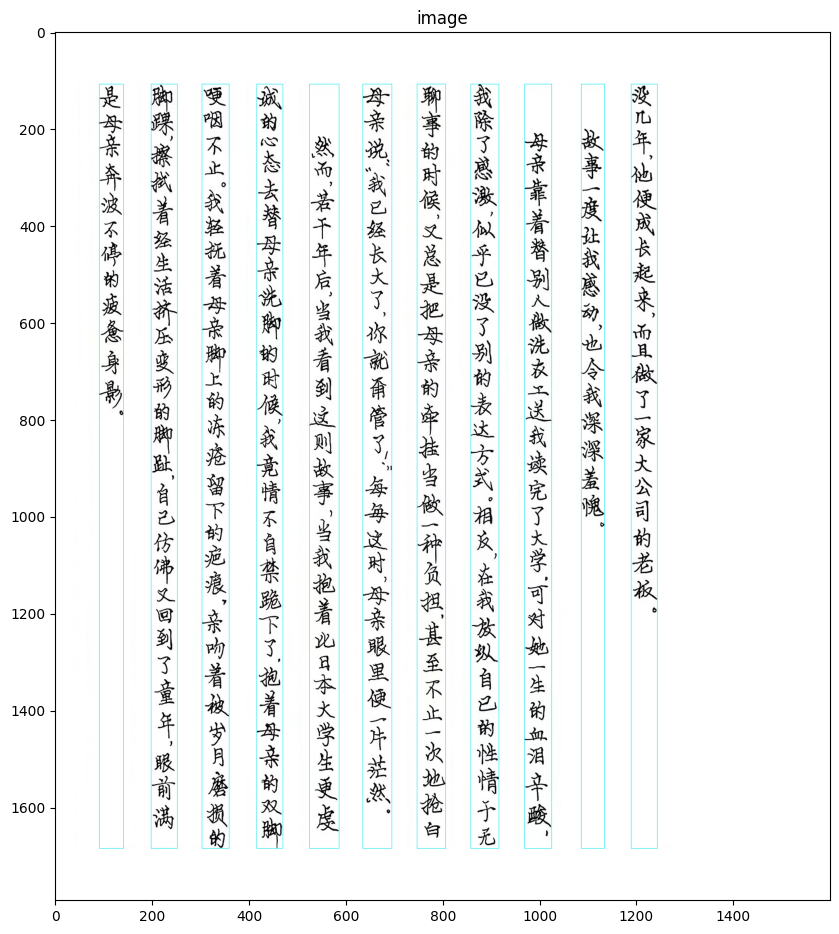

In [4]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(10,15))
 
'''水平投影'''

def getHProjection(image): 
    hProjection = np.zeros(image.shape,np.uint8) 
 #图像高与宽 
    (h,w)=image.shape  
 #长度与图像高度一致的数组 
    h_ = [0]*h 
 #循环统计每一行白色像素的个数 
    for y in range(h):
        for x in range(w):
            if image[y,x] == 255:
                h_[y]+=1
#绘制水平投影图像
    for y in range(h):
        for x in range(h_[y]):
            hProjection[y,x] = 255 
    plt.title("hProjection2")
    plt.imshow(hProjection)
            
    return h_
 

def getVProjection(image):
    vProjection = np.zeros(image.shape,np.uint8);
#图像高与宽
    (h,w) = image.shape
 #长度与图像宽度一致的数组
    w_ = [0]*w
 #循环统计每一列白色像素的个数
    for x in range(w):
        for y in range(h):
            if image[y,x] == 255:
                w_[x]+=1
 #绘制垂直平投影图像
    for x in range(w):
        for y in range(h-w_[x],h):
            vProjection[y,x] = 255
    plt.title('vProjection')
    plt.imshow(vProjection)
    return w_
 
####################################

def DOIT(rawPic):
    print('start')
 #读入原始图像 
    # rawPic = r'H:\TEMP\TEXT_PROCCESS\TEST01.jpg'
    origineImage = cv2.imread(rawPic)
    print('origineImage')
    plt.title("origineImage")
    plt.imshow(origineImage)

 # 图像灰度化  
     #image = cv2.imread('test.jpg',0) 
    image = cv2.cvtColor(origineImage,cv2.COLOR_BGR2GRAY) 
    print('灰度化')
    plt.title("gray")
    plt.imshow( image) 
 # 将图片二值化
    retval, img = cv2.threshold(image,127,255,cv2.THRESH_BINARY_INV)
    print('图片二值化')
    plt.title("binary")
    plt.imshow(img)
 #图像高与宽
    print('图像高与宽')
    (h,w)=img.shape 
    Position = []
    # print(' (h,w)::\n '+h+'\n'+w)
 #水平投影
    print('水平投影')
    H = getHProjection(img) 
    start = 0
    H_Start = []
    H_End = []
 #根据水平投影获取垂直分割位置
    print('根据水平投影获取垂直分割位置')
    print('len(H):: '+ str(len(H)))
    for i in range(len(H)):
        if H[i] > 0 and start ==0:
            H_Start.append(i)
            start = 1
        if H[i] <= 0 and start == 1:
            H_End.append(i)
            start = 0

 #分割行，分割之后再进行列分割并保存分割位置
    print('分割行，分割之后再进行列分割并保存分割位置')
    print('len(H_Start):: '+str(len(H_Start)))
    for i in range(len(H_Start)):
        #获取行图像
        cropImg = img[H_Start[i]:H_End[i], 0:w]
        plt.title("cropImg")
        plt.imshow(cropImg)

  #对行图像进行垂直投影
        W = getVProjection(cropImg)
        Wstart = 0
        Wend = 0
        W_Start = 0
        W_End = 0
    print('len(W):: '+str(len(W)))  
    for j in range(len(W)):
        if W[j] > 0 and Wstart ==0:
            W_Start =j
            Wstart = 1
            Wend=0

        if W[j] <= 0 and Wstart == 1:
            W_End =j
            Wstart = 0
            Wend=1
            
        if Wend == 1:
            Position.append([W_Start,H_Start[i],W_End,H_End[i]])
            Wend =0

 #根据确定的位置分割字符
    print('pos:: '+str(len(Position)))
    for m in range(len(Position)):
        cv2.rectangle(origineImage, (Position[m][0],Position[m][1]), (Position[m][2],Position[m][3]), (0 ,229 ,238), 1)
        plt.title("image")
        plt.imshow(origineImage)
        cv2.waitKey(0)

####################################
DOIT(r'H:\TEMP\TEXT_PROCCESS\TEST08.jpg')
####################################

# if __name__== "__main__":

#  #读入原始图像
#     rawPic = r'H:\TEMP\TEXT_PROCCESS\TEST01.jpg'
#     origineImage = cv2.imread(rawPic)
#     fig.imshow('image',origineImage)
#  # 图像灰度化 
#  #image = cv2.imread('test.jpg',0)
#     image = cv2.cvtColor(origineImage,cv2.COLOR_BGR2GRAY)
#     fig.imshow('gray',image)
#  # 将图片二值化
#     retval, img = cv2.threshold(image,127,255,cv2.THRESH_BINARY_INV)
#     fig.imshow('binary',img)
#  #图像高与宽
#     (h,w)=img.shape 
#     Position = []
#  #水平投影
#     H = getHProjection(img) 
#     start = 0
#     H_Start = []
#     H_End = []
#  #根据水平投影获取垂直分割位置
#     for i in range(len(H)):
#         if H[i] > 0 and start ==0:
#             H_Start.append(i)
#             start = 1
#         if H[i] <= 0 and start == 1:
#             H_End.append(i)
#             start = 0
#  #分割行，分割之后再进行列分割并保存分割位置
#     for i in range(len(H_Start)):
#   #获取行图像
#         cropImg = img[H_Start[i]:H_End[i], 0:w]
#   #fig.imshow('cropImg',cropImg)
#   #对行图像进行垂直投影
#         W = getVProjection(cropImg)
#         Wstart = 0
#         Wend = 0
#         W_Start = 0
#         W_End = 0
#     for j in range(len(W)):
#         if W[j] > 0 and Wstart ==0:
#             W_Start =j
#             Wstart = 1
#             Wend=0
#         if W[j] <= 0 and Wstart == 1:
#             W_End =j
#             Wstart = 0
#             Wend=1
#         if Wend == 1:
#             Position.append([W_Start,H_Start[i],W_End,H_End[i]])
#             Wend =0
#  #根据确定的位置分割字符
#     for m in range(len(Position)):
#         cv2.rectangle(origineImage, (Position[m][0],Position[m][1]), (Position[m][2],Position[m][3]), (0 ,229 ,238), 1)
#         fig.imshow('image',origineImage)
#         cv2.waitKey(0)

In [ ]:
DOIT(r'H:\TEMP\TEXT_PROCCESS\TEST01.jpg')

In [25]:
#############

## TEST  识别区域过小  不正常

save to  resultX/crop0.png
save to  resultX/crop1.png
save to  resultX/crop2.png
save to  resultX/crop3.png
save to  resultX/crop4.png
save to  resultX/crop5.png
save to  resultX/crop6.png
save to  resultX/crop7.png
save to  resultX/crop8.png
save to  resultX/crop9.png
save to  resultX/crop10.png
save to  resultX/crop11.png
save to  resultX/crop12.png
save to  resultX/crop13.png
save to  resultX/crop14.png
save to  resultX/crop15.png
save to  resultX/crop16.png
save to  resultX/crop17.png
save to  resultX/crop18.png
save to  resultX/crop19.png
save to  resultX/crop20.png
save to  resultX/crop21.png
save to  resultX/crop22.png
save to  resultX/crop23.png
save to  resultX/crop24.png
save to  resultX/crop25.png
save to  resultX/crop26.png
save to  resultX/crop27.png
save to  resultX/crop28.png
save to  resultX/crop29.png
save to  resultX/crop30.png
save to  resultX/crop31.png
save to  resultX/crop32.png
save to  resultX/crop33.png
save to  resultX/crop34.png
save to  resultX/crop35.png
sa

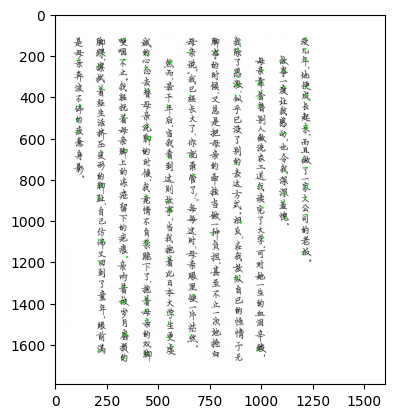

In [31]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

rawPicPath = r"H:\TEMP\TEXT_PROCCESS\TEST08.jpg"

img = cv2.imread(rawPicPath, cv2.IMREAD_COLOR)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel, iterations=2)
closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel, iterations=2)
contours, hierarchy = cv2.findContours(closing, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
for i, contour in enumerate(contours):
    x, y, w, h = cv2.boundingRect(contour)
    # if w < 10 or h < 10:
    #     # print('conti~')
    #     continue
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
    crop_img = img[y:y+h, x:x+w]
    savePath ='resultX/crop' + str(i) + '.png'
    print('save to  '+savePath)
    cv2.imwrite(savePath, crop_img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()
 

## 古文分割方法 竖版成功方法

In [2]:
import cv2
import numpy as np

HIOG = 50
VIOG = 3
Position = []
 
'''水平投影'''
def getHProjection(image):
    hProjection = np.zeros(image.shape,np.uint8)
    # 获取图像大小
    (h,w)=image.shape
    # 统计像素个数
    h_ = [0]*h
    for y in range(h):
        for x in range(w):
            if image[y,x] == 255:
                h_[y]+=1
    #绘制水平投影图像
    for y in range(h):
        for x in range(h_[y]):
            hProjection[y,x] = 255
    # cv2.imshow('hProjection2',cv2.resize(hProjection, None, fx=0.3, fy=0.5, interpolation=cv2.INTER_AREA))
    # cv2.waitKey(0)
    return h_
 
def getVProjection(image):
    vProjection = np.zeros(image.shape,np.uint8);
    (h,w) = image.shape
    w_ = [0]*w
    for x in range(w):
        for y in range(h):
            if image[y,x] == 255:
                w_[x]+=1
    for x in range(w):
        for y in range(h-w_[x],h):
            vProjection[y,x] = 255
    # cv2.imshow('vProjection',cv2.resize(vProjection, None, fx=1, fy=0.1, interpolation=cv2.INTER_AREA))
    # cv2.waitKey(0)
    return w_


def scan(vProjection, iog, pos = 0):
    start = 0
    V_start = []
    V_end = []

    for i in range(len(vProjection)):
        if vProjection[i] > iog and start == 0:
            V_start.append(i)
            start = 1
        if vProjection[i] <= iog and start == 1:
            if i - V_start[-1] < pos:
                continue
            V_end.append(i)
            start = 0
    return V_start, V_end


def checkSingle(image):
    h = getHProjection(image)
    start = 0
    end = 0

    for i in range(h):
        pass

#分割
def CropImage(image,dest,boxMin,boxMax):
    a=boxMin[1]
    b=boxMax[1]
    c=boxMin[0]
    d=boxMax[0]
    cropImg = image[a:b,c:d]
    cv2.imwrite(dest,cropImg)
    
#开始识别
def DOIT(rawPic):
        # 读入原始图像
    origineImage = cv2.imread(rawPic)
    # 图像灰度化   
    #image = cv2.imread('test.jpg',0)
    image = cv2.cvtColor(origineImage,cv2.COLOR_BGR2GRAY)
    
    # cv2.imshow('gray',image)
    # 将图片二值化
    retval, img = cv2.threshold(image,127,255,cv2.THRESH_BINARY_INV)
    # kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
    # img = cv2.erode(img, kernel)
    # cv2.imshow('binary',cv2.resize(img, None, fx=0.3, fy=0.3, interpolation=cv2.INTER_AREA))
    #图像高与宽
    (h,w)=img.shape
    #垂直投影
    V = getVProjection(img)
 
    start = 0
    V_start = []
    V_end = []

    # 对垂直投影水平分割
    V_start, V_end = scan(V, HIOG)
    if len(V_start) > len(V_end):
        V_end.append(w-5)

    # 分割行，分割之后再进行列分割并保存分割位置
    for i in range(len(V_end)):
        #获取行图像
        if V_end[i] - V_start[i] < 30:
            continue

        cropImg = img[0:h, V_start[i]:V_end[i]]
        # cv2.imshow('cropImg',cropImg)
        # cv2.waitKey(0)
        #对行图像进行垂直投影
        H = getHProjection(cropImg)
        H_start, H_end = scan(H, VIOG, 40)


        if len(H_start) > len(H_end):
            H_end.append(h-5)

        for pos in range(len(H_start)):
            # 再进行一次列扫描
            DcropImg = cropImg[H_start[pos]:H_end[pos], 0:w]
            d_h, d_w = DcropImg.shape
            # cv2.imshow("dcrop", DcropImg)
            sec_V = getVProjection(DcropImg)
            c1, c2 = scan(sec_V, 0)
            if len(c1) > len(c2):
                c2.append(d_w)

            x = 1
            while x < len(c1):
                if c1[x] - c2[x-1] < 12:
                    c2.pop(x-1)
                    c1.pop(x)
                    x -= 1
                x += 1

            # cv2.waitKey(0)
            if len(c1) == 1:
                Position.append([V_start[i],H_start[pos],V_end[i],H_end[pos]])
            else:
                for x in range(len(c1)):
                    Position.append([V_start[i]+c1[x], H_start[pos],V_start[i]+c2[x], H_end[pos]])

    #根据确定的位置分割字符
    number=0
    offsetX = 10
    offsetY = 5
    for m in range(len(Position)):
        rectMin =  (Position[m][0]-offsetX,Position[m][1]-offsetY)
        rectMax =  (Position[m][2]+offsetX,Position[m][3]+offsetY)
        #原图文字打框
        # cv2.rectangle(origineImage,rectMin, rectMax, (0 ,0 ,255), 2)
        #start-crop
        number=number+1
        CropImage(origineImage,'./result/' + '%d.jpg' % number,rectMin,rectMax)
        
    cv2.imshow('image',cv2.resize(origineImage, None, fx=0.6, fy=0.6, interpolation=cv2.INTER_AREA))
    # cv2.imshow('image',origineImage)
    #原图保存
    # cv2.imwrite('./result/' + 'ResultImage.jpg' , origineImage)
    cv2.waitKey(0)

#############################
rawPicPath = r".\PIC\TEST05.jpg"
DOIT(rawPicPath)
############################# 



error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1272: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvShowImage'


In [15]:
import easyocr

import shutil


#设置识别中英文两种语言
reader = easyocr.Reader(['ch_sim','en'], gpu = False) # need to run only once to load model into memory
for i in range(1,200):
    filePath = "./result/"+str(i)+".jpg"
    result = reader.readtext(filePath, detail = 0)
    print(result)
    if(len(result)==0):
        continue
    destPath = "./resultX/"+result[0]+".jpg" 
    print('sour :: '+ filePath)
    print('dest :: '+ destPath)
    shutil.copyfile(filePath, destPath)


Using CPU. Note: This module is much faster with a GPU.


['敛']
sour :: ./result/1.jpg
dest :: R:/_NOTE_/compute/python/ocr_demo/resultX/敛.jpg
['是']
sour :: ./result/2.jpg
dest :: R:/_NOTE_/compute/python/ocr_demo/resultX/是.jpg
[]
[]
[]
[]
[]
['傅']
sour :: ./result/8.jpg
dest :: R:/_NOTE_/compute/python/ocr_demo/resultX/傅.jpg
['肉']
sour :: ./result/9.jpg
dest :: R:/_NOTE_/compute/python/ocr_demo/resultX/肉.jpg
['疲']
sour :: ./result/10.jpg
dest :: R:/_NOTE_/compute/python/ocr_demo/resultX/疲.jpg
[]
[]
[]
[]
['脚']
sour :: ./result/15.jpg
dest :: R:/_NOTE_/compute/python/ocr_demo/resultX/脚.jpg
['踝']
sour :: ./result/16.jpg
dest :: R:/_NOTE_/compute/python/ocr_demo/resultX/踝.jpg
[]
['弑']
sour :: ./result/18.jpg
dest :: R:/_NOTE_/compute/python/ocr_demo/resultX/弑.jpg
['着']
sour :: ./result/19.jpg
dest :: R:/_NOTE_/compute/python/ocr_demo/resultX/着.jpg
['{']
sour :: ./result/20.jpg
dest :: R:/_NOTE_/compute/python/ocr_demo/resultX/{.jpg
[]
['活']
sour :: ./result/22.jpg
dest :: R:/_NOTE_/compute/python/ocr_demo/resultX/活.jpg
[]
[]
[]
[]
['的']
sour ::

OSError: [Errno 22] Invalid argument: 'R:/_NOTE_/compute/python/ocr_demo/resultX/|.jpg'

##  位图 转 SVG 方法

error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


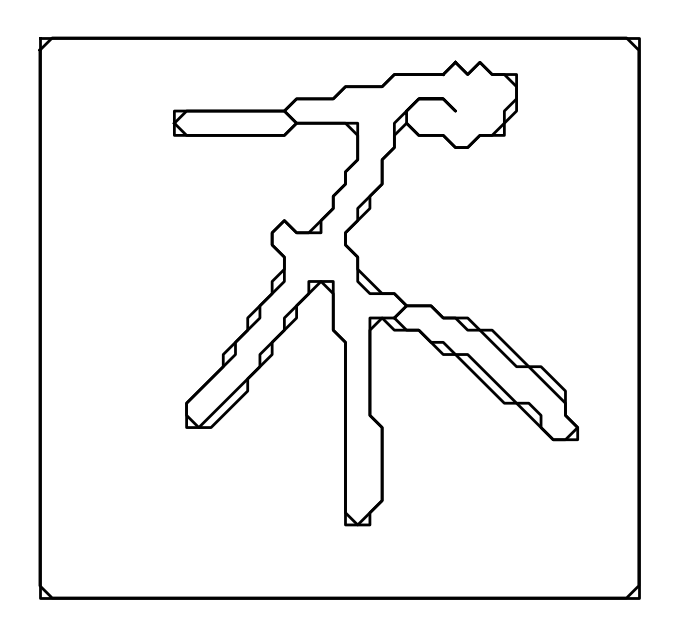

In [24]:
from typing import Iterable, List, Tuple, Union
import cv2
import matplotlib.pyplot as plt
import numpy as np
from xml.dom import minidom as md
from queue import Queue
import warnings

def look_shape(a : Iterable) -> Tuple:
    # for debug
    return np.array(a).shape

def length_within_points(a : Iterable, empty_value : Union[int, float] = 0) -> int:
    """
        a simple instance:
            array : [empty_value, empty_value, empty_value, 1, empty_value, 0, 1, 2, empty_value]
            Then length_within_points(array) will return index diff between 1 and 2, which is 5
    """
    a = list(a)
    l_pivot, r_pivot = -1, -2
    for index, (l_val, r_val) in enumerate(zip(a[::1], a[::-1])):
        if l_val != empty_value and l_pivot == -1:
            l_pivot = index 
        if r_val != empty_value and r_pivot == -2:
            r_pivot = len(a) - index

    return r_pivot - l_pivot + 1

def dump_rings_from_image(image : np.ndarray, output_path : str, plot_dict : dict = {"color" : "k", "linewidth" : 2.0}, default_height : float = 8) -> List[np.ndarray]:
    # regular operation, no more explainations
    # blur = cv2.GaussianBlur(image, (3, 3), 0)
    # gray = cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY) 
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    edge = cv2.Canny(gray, 50, 150)

    # get ratio between width and height to adjust the final output
    valid_width = length_within_points(edge.sum(axis=0))
    valid_height = length_within_points(edge.sum(axis=1))
    true_ratio = valid_width / valid_height

    # get contour of the edge image
    contour_tuple = cv2.findContours(edge, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
    contours = contour_tuple[0]
    rings = [np.array(c).reshape([-1, 2]) for c in contours]

    # adjust coordinate system to the image coordinate system
    max_x, max_y, min_x, min_y = 0, 0, 0, 0
    for ring in rings:
        max_x = max(max_x, ring.max(axis=0)[0])
        max_y = max(max_y, ring.max(axis=0)[1])
        min_x = max(min_x, ring.min(axis=0)[0])
        min_y = max(min_y, ring.min(axis=0)[1])
    
    # adjust ratio
    plt.figure(figsize=[default_height * true_ratio, default_height])

    # plot to the matplotlib
    for _, ring in enumerate(rings):
        close_ring = np.vstack((ring, ring[0]))
        xx = close_ring[..., 0]
        yy = max_y - close_ring[..., 1]
        plt.plot(xx, yy, **plot_dict)

    plt.axis("off")
    plt.savefig(output_path)

def remove_matplotlib_background(svg_file : str, bg_node_name : str = "patch_1") -> None:
    dom_tree : md.Document = md.parse(svg_file)
    svg_node = None 
    # select the svg tag
    for node in dom_tree.childNodes:
        if node.nodeName == "svg":
            svg_node : md.Element = node 
    if svg_node is None:
        raise ValueError("not find a svg node in {}".format(svg_file))

    # bfs svg node to find the background node
    q = Queue()
    q.put(svg_node)
    target_node = None  # we will remove the target node

    while not q.empty():
        cur : md.Node = q.get()
        if cur.hasChildNodes():
            for node in cur.childNodes:
                q.put(node)
        if hasattr(cur, "getAttribute"):
            # this is the id of the background node
            if cur.getAttribute("id") == bg_node_name:
                target_node = cur
    
    if target_node is None:
        warnings.warn("background node is not found, please ensure whether bg_node_name is correct")
    else:       # remove and write
        target_node.parentNode.removeChild(target_node)
        with open(svg_file, "w", encoding="utf-8") as fp:
            dom_tree.writexml(
                writer=fp,
                indent="\t"
            )

def bitmap_to_contour_svg(input_bitmap_path : str, output_svg_path : str):
    img = cv2.imread(input_bitmap_path)
    dump_rings_from_image(img, output_path=output_svg_path)
    remove_matplotlib_background(output_svg_path)

##############
##############
input_bitmap_path=r"H:\TEMP\TEXT_PROCCESS\result\181.jpg"
output_svg_path="./result/KID.svg" 
bitmap_to_contour_svg(   input_bitmap_path    ,     output_svg_path    )
##############
if __name__ == '__main__':
    bitmap_to_contour_svg(
        input_bitmap_path="./images/KID.jpg",
        output_svg_path="./images/KID.svg"
    )

# pytesseract  OCR识别


In [11]:
from PIL import Image
import pytesseract

text = pytesseract.image_to_string(Image.open('./PIC/TEXT33.png'),lang='chi_sim')
print(text)


# for i in range(1,200):
#     filePath = "./result/"+str(i)+".jpg"
#     result =  pytesseract.image_to_string(Image.open(filePath),lang='chi_sim')
#     print(result)

声音有点干汲。我打从心底感到害怕。钟已经
转了帮圈了? 现在是几月几号? 我不顾一切地冲出
房间局走下楼梯 打开了信箱内的报纸。还好，只
是睡了二个晚二 我心里感到了宽慰。但有一点是
确切的，那就是连续睡眠的时间已经很不寻常了。
我认识到自己的身体出了毛病。眼前总觉得晕学平
乎的。黎明时分的青白色在街埠中草延，路灯的灯
光是透明的。我真的非常害怕回到房间里去。肯定
又会睡过去一 -心里甚至想，索性就放开手脚睡个




In [12]:
import requests
import json

url = "http://127.0.0.1:1224/api/ocr"
data = {
    "base64": "iVBORw0KGgoAAAANSUhEUgAAAC4AAAAXCAIAAAD7ruoFAAAACXBIWXMAABnWAAAZ1gEY0crtAAAAEXRFWHRTb2Z0d2FyZQBTbmlwYXN0ZV0Xzt0AAAHjSURBVEiJ7ZYrcsMwEEBXnR7FLuj0BPIJHJOi0DAZ2qSsMCxEgjYrDQqJdALrBJ2ASndRgeNI8ledutOCLrLl1e7T/mRkjIG/IXe/DWBldRTNEoQSpgNURe5puiiaJehrMuJSXSTgbaby0A1WzLrCCQCmyn0FwoN0V06QONWAt1nUxfnjHYA8p65GjhDKxcjedVH6JOejBPwYh21eE0Wzfe0tqIsEkGXcVcpoMH4CRZ+P0lsQp/pWJ4ripf1XFDFe8GHSHlYcSo9Es31t60RdFlN1RUmrma5oTzTVB8ZUaeeYEC9GmL6kNkDw9BANAQYo3xTNdqUkvHq+rYhDKW0Bj3RSEIpmyWyBaZaMTCrCK+tJ5Jsa07fs3E7esE66HzralRLgJKp0/BD6fJRSxvmDsb6joqkcFXGqMVVFFEHDL2gTxwCAaTabnkFUWhDCHTd9iYrGcAL1ZnqIp5Vpiqh7bCfua7FA4qN0INMcN1+cgCzj+UFxtbmvwdZvGIrI41JiqhZBWhhF8WxorkYPpQwJiWYJeA3rXE4hzcwJ+B96F9zCFHC0FcVegghvFul7oeEE8PvHeJqC0w0AUbbFIT8JnEwGbPKcS2OxU3HMTqD0r4wgEIuiKJ7i4MS16+og8/+bPZRPLa+6Ld2DSzcAAAAASUVORK5CYII=",
    # 可选参数
    # Paddle引擎模式
    # "options": {
    #     "ocr.language": "models/config_chinese.txt",
    #     "ocr.cls": False,
    #     "ocr.limit_side_len": 960,
    #     "tbpu.parser": "MergeLine",
    # }
    # Rapid引擎模式
    # "options": {
    #     "ocr.language": "简体中文",
    #     "ocr.angle": False,
    #     "ocr.maxSideLen": 1024,
    #     "tbpu.parser": "MergeLine",
    # }
}
headers = {"Content-Type": "application/json"}
data_str = json.dumps(data)
response = requests.post(url, data=data_str, headers=headers)
if response.status_code == 200:
    res_dict = json.loads(response.text)
    print("返回值字典\n", res_dict)

返回值字典
 {'code': 100, 'data': [{'box': [[0, 0], [45, 0], [45, 22], [0, 22]], 'score': 0.994343101978302, 'text': '示例'}], 'score': 0.994343101978302, 'time': 1.285735845565796, 'timestamp': 1707808863.1623192}


In [17]:

import base64

img_path= './PIC/TEST06.png'
with open(img_path,'rb') as f:
    image_base64 = base64.b64encode(f.read())
    # image_base64 = image_base64.replace('b','')
    # image_base64 = image_base64.replace('',"\'")
    image_base64 =str(image_base64,'utf-8')
    # print(image_base64)
    # print(str(image_base64,'utf-8'))
    

iVBORw0KGgoAAAANSUhEUgAAAK8AAADMCAYAAAAF8vOBAAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAADsMAAA7DAcdvqGQAABSCSURBVHhe7Z17lBTVncf7bLJHk01cza5uNNmVJCcagw9UQGgVMbAhcVl31yWJq2CGo46AUUF5i+E5wOgAg7zfDA+RCFFkGFRU4nOQ1/AaXuObh+OAgogww+B89/5u3aquqq6urhq6Gm/z+5zzO91VXdX9z2e+86vb91bHwDCawvIy2sLyMtrC8jLawvIy2sLyMtrC8jLawvIy2sLyMtrC8jLawvIy2sLyMtrC8jLawvIy2sLyMtrC8jLaEkremx+d06hqK+omUQyTSULL+9gGYPBG4M/i8dH1QL91wCPvAA+tAXq8DeS/CXR9A+jyGvC7V4FbXgI6vAjcODCAvGX5iBdXqY0qFMfzUaa2UlOG/JjfcfR6DDFZcVhvL6gqjot9QT6D+SYSWt6hFcBwUfRIIvcXAvdea8h7P8n7liEvifsbIe6vhbjtXwCuH5AhecUxhoj+lW+dKOSNF4t3o/cT8hb7nC+PY3QhtLxDfOSl5L1HJO/vVyek/dVKoK2o1inlVVKRNT7yluUrIUnehJmC5OSlRE0pL9uZMzS6baBHs214WLQND5QD94nUve0V4N+FtO2UtG2ERDesAK7r31h5jX/71v7GyGulqymv/Q8j+XxGD0LLO1AIa5bZ7z4oxO0mUve/hbjthLg3C2lvEjbcKKS9XlTrUqBlv2DyJv6F54vEtAunsB/jU6mT1/5HIT5DJbpTeEYHQsvbR7QIfYW01Cr0UolLfW7HVUaLIKUVZUp73XKghajmAeUN1POGTV5PeemlxHuxvPoRWt6eorel/pbS1uxx6cLM3iLEhbStRJG01z4PXC3qmr6nUV4rkd3JG0dcpDsdy/LqRyh5aby2uxC2m0haStsurxv9rSWtKJK2JSUtCSuq

In [40]:

# import base64

# img_path= './result/123.jpg'
# with open(img_path,'rb') as f:
#     image_base64 = base64.b64encode(f.read())
#     image_base64 =str(image_base64,'utf-8')
#     # print(image_base64)
    

# import requests
# import json

# url = "http://127.0.0.1:1224/api/ocr"
# data = {
#     "base64": image_base64,
#     # 可选参数
#     # Paddle引擎模式
#     # "options": {
#     #     "ocr.language": "models/config_chinese.txt",
#     #     "ocr.cls": False,
#     #     "ocr.limit_side_len": 960,
#     #     "tbpu.parser": "MergeLine",
#     # }
#     # Rapid引擎模式
#     # "options": {
#     #     "ocr.language": "简体中文",
#     #     "ocr.angle": False,
#     #     "ocr.maxSideLen": 1024,
#     #     "tbpu.parser": "MergeLine",
#     # }
# }
# headers = {"Content-Type": "application/json"}
# data_str = json.dumps(data)
# response = requests.post(url, data=data_str, headers=headers)
# if response.status_code == 200:
#     res_dict = json.loads(response.text)
#     print("返回值字典\n", res_dict)
#     resText = res_dict['data'][0]['text']


############################################
import base64
import requests
import json

def UMI_OCR_OPT(url,img_path): 
    # url = "http://127.0.0.1:1224/api/ocr"
    # img_path= './result/123.jpg'
 
    with open(img_path,'rb') as f:
        image_base64 = base64.b64encode(f.read())
        image_base64 =str(image_base64,'utf-8')
    
    data = {
        "base64": image_base64,
        # 可选参数
        # Paddle引擎模式
        # "options": {
        #     "ocr.language": "models/config_chinese.txt",
        #     "ocr.cls": False,
        #     "ocr.limit_side_len": 960,
        #     "tbpu.parser": "MergeLine",
        # }
        # Rapid引擎模式
        # "options": {
        #     "ocr.language": "简体中文",
        #     "ocr.angle": False,
        #     "ocr.maxSideLen": 1024,
        #     "tbpu.parser": "MergeLine",
        # }
    }
    headers = {"Content-Type": "application/json"}
    data_str = json.dumps(data)
    response = requests.post(url, data=data_str, headers=headers)
    if response.status_code == 200:
        res_dict = json.loads(response.text)
        print("返回值字典\n", res_dict)
        if(str(res_dict).find('No text found in image')!=-1):
            return ''
        resText = res_dict['data'][0]['text']
        return resText
    return ''


# 利用python 调用 umi-ocr api 识别中文字

In [44]:
  
############################################
import base64
import requests
import json

#API访问使用
def UMI_OCR_OPT(url,img_path): 
    # url = "http://127.0.0.1:1224/api/ocr"
    # img_path= './result/123.jpg'
 
    with open(img_path,'rb') as f:
        image_base64 = base64.b64encode(f.read())
        image_base64 =str(image_base64,'utf-8')
    
    data = {
        "base64": image_base64,
        # 可选参数
        # Paddle引擎模式
        # "options": {
        #     "ocr.language": "models/config_chinese.txt",
        #     "ocr.cls": False,
        #     "ocr.limit_side_len": 960,
        #     "tbpu.parser": "MergeLine",
        # }
        # Rapid引擎模式
        # "options": {
        #     "ocr.language": "简体中文",
        #     "ocr.angle": False,
        #     "ocr.maxSideLen": 1024,
        #     "tbpu.parser": "MergeLine",
        # }
    }
    headers = {"Content-Type": "application/json"}
    data_str = json.dumps(data)
    response = requests.post(url, data=data_str, headers=headers)
    if response.status_code == 200:
        res_dict = json.loads(response.text)
        #检测失败与否
        if(str(res_dict).find('No text found in image')!=-1):
            # print("返回失败内容\n", res_dict)
            return ''
        print("返回值字典\n", res_dict)
        resText = res_dict['data'][0]['text']
        return resText
    return ''


In [46]:
import easyocr

import shutil

error =''

#api地址
uni_orc_url="http://127.0.0.1:1224/api/ocr"
#将所有字体
for i in range(1,285):
    filePath = "./result/"+str(i)+".jpg"
    # result = reader.readtext(filePath, detail = 0)
    result = UMI_OCR_OPT(uni_orc_url,filePath)
    if(len(result)==0 or result == ''):
        error+= filePath +'\n'
        continue
    print(result)
    destPath = "./resultX/"+result[0]+".jpg" 
    print('sour :: '+ filePath)
    print('dest :: '+ destPath)
    shutil.copyfile(filePath, destPath)

print('error:\n'+error)


返回值字典
 {'code': 100, 'data': [{'box': [[0, 1], [34, 1], [34, 28], [0, 28]], 'score': 0.9172705411911011, 'text': '级'}], 'score': 0.9172705411911011, 'time': 0.09973311424255371, 'timestamp': 1707811239.0527186}
级
sour :: ./result/1.jpg
dest :: ./resultX/级.jpg
返回值字典
 {'code': 100, 'data': [{'box': [[0, 0], [45, 0], [45, 54], [0, 54]], 'score': 0.9752017259597778, 'text': '是'}], 'score': 0.9752017259597778, 'time': 0.01795196533203125, 'timestamp': 1707811239.07466}
是
sour :: ./result/2.jpg
dest :: ./resultX/是.jpg
返回失败内容
 {'code': 101, 'data': 'No text found in image. Path: "base64"', 'time': 0.017566204071044922, 'timestamp': 1707811239.095218}
返回值字典
 {'code': 100, 'data': [{'box': [[6, 0], [44, 0], [44, 49], [6, 49]], 'score': 0.9813552498817444, 'text': '亲'}], 'score': 0.9813552498817444, 'time': 0.02094292640686035, 'timestamp': 1707811239.1191537}
亲
sour :: ./result/4.jpg
dest :: ./resultX/亲.jpg
返回值字典
 {'code': 100, 'data': [{'box': [[6, 0], [47, 0], [47, 43], [6, 43]], 'score': 0.9